## Why is Twitter used for sentiment analysis ?

## How to perform sentiment analysis using python ?

### Requirements

In [1]:
import numpy as np
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
from better_profanity import profanity

In [2]:
consumer_key = 'B0GMZwbKM8fN9O9GX0fQHcn4C'
consumer_secret = 'DeH56tsVvWByPSOuvygOff1PDzDVapHyeygPwMBR3WUyzfm1LE'
access_token = '578254822-Oj66oa07IJszvCAtXWDtD7jcqiqAJyrmQ7a1Tll5'
access_token_secret = 'O4Azo0i4pZ2YKMbXjkNVcfr9f8zyvGp3mswSFhRn9idm4'

In [3]:
auth = tweepy.OAuth1UserHandler(
   consumer_key, consumer_secret, access_token, access_token_secret
)

In [4]:
api = tweepy.API(auth)

In [5]:
# asking the user for keywords of interest 
query = input("what are you interested in knowing about ? ") 

#filetering the query to remove retweets 
filtered_query = query + "-filter:retweets"
tweets = tweepy.Cursor(api.search_tweets,q=filtered_query,lang="en").items(1000)
list1 = [[tweet.text, tweet.user.screen_name, tweet.user.location] for tweet in tweets]

what are you interested in knowing about ? kl rahul


In [6]:
# new data frame object which containes required information 
new_tweet_data = pd.DataFrame(data = list1,columns=['Tweet','User', "location"])

In [7]:
new_tweet_data

,Tweet,User,location
0,I want Mayank Agarwal to come LSG with his bro...,kunaalyaadav,"New Delhi, India"
1,"KL Rahul ran swiftly, picked up the ball &amp;...",_IamRPd,"Pennsylvania, USA"
2,KL Rahul is a Gem of a Cricketer.\nThe only pr...,Hindutva_108,हिंदुस्तान
3,"After the #INDvsBAN Match, every Indian fan go...",shivanisme,
4,3 things to keep in mind for Cricket Twitter ...,Aryan91517546,
...,...,...,...
995,@CricCrazyJohns Kl Rahul is a impact today he ...,Himansh23626590,"Jaipur, India."
996,KL Rahul will milk this inning on easy wicket ...,parthkaanarth,
997,@virendersehwag Hatred for Kl rahul was totaly...,big_bull12,
998,@ESPNcricinfo KL Rahul getting Das run out cha...,SasiChandru13,Washington DC


In [8]:
#converting only tweets data to a list for further processig 
tweet_list = new_tweet_data.Tweet.to_list()

In [9]:
tweet_list

['I want Mayank Agarwal to come LSG with his brother KL Rahul.🥳 #IPL2023 https://t.co/R3CUgr16tY https://t.co/PT9TZYnFjk',
 'KL Rahul ran swiftly, picked up the ball &amp; did a direct hit on wickets. He didn’t slip.\nLitton Das allegedly slippe… https://t.co/As8lPdCSWA',
 'KL Rahul is a Gem of a Cricketer.\nThe only problem with him is his defensive mindset.\nWhen he attacks, no one can match him.\n#T20WorldCup',
 'After the #INDvsBAN Match, every Indian fan goes to KL Rahul in the #T20 World Cup.#VarisuFirstSingle #zepverse… https://t.co/Wz4cTTaobP',
 '3 things to keep in mind for  Cricket Twitter fans ---\n\n1)Virat fans should only beef with Sachin Fans. \n2) Babar f… https://t.co/JkY972LMk3',
 "@RajeevS80228221 @hazharoon Once in a blue moon😂 but Rohit KL Rahul virat kholi father's always Shaheen😂",
 'KL Rahul and Athiya Shetty leaving together for Melbourne! #TeamIndia https://t.co/GKq6JhB1tr',
 'Every Indian Fan to KL Rahul after the #INDvsBAN Match...\n#T20WorldCup https://t.co

In [10]:
#the below function cleans the tweets.It Removes profanity, unnecessary characters, spaces, and stopwords.

def clean_tweet(tweet):
    import re
    if type(tweet) == float:
        return ""
    r = tweet.lower()
    r = profanity.censor(r)
    r = re.sub("'", "", r) # This is to avoid removing contractions in english
    r = re.sub("@[A-Za-z0-9_]+","", r)
    r = re.sub("#[A-Za-z0-9_]+","", r)
    r = re.sub(r'http\S+', '', r)
    r = re.sub('[()!?]', ' ', r)
    r = re.sub('\[.*?\]',' ', r)
    r = re.sub("[^a-z0-9]"," ", r)
    r = r.split()
    stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from"]
    r = [w for w in r if not w in stopwords]
    r = " ".join(word for word in r)
    return r

In [11]:
cleaned = [clean_tweet(tweet) for tweet in tweet_list]

In [12]:
cleaned

['i want mayank agarwal come lsg with his brother kl rahul',
 'kl rahul ran swiftly picked up ball amp did direct hit wickets he didn t slip litton das allegedly slippe',
 'kl rahul is gem cricketer only problem with him is his defensive mindset when he attacks no one can match him',
 'after match every indian fan goes kl rahul world cup',
 '3 things keep mind cricket twitter fans 1 virat fans should only beef with sachin fans 2 babar f',
 'once blue moon but rohit kl rahul virat kholi fathers always shaheen',
 'kl rahul athiya shetty leaving together melbourne',
 'every indian fan kl rahul after match',
 'may be kl rahul should have been potm coz apart his terrific 50 he effected that brilliant gam',
 'so this was reason behind kl rahuls performance yesterdays match',
 't20 world cup 2022 those who dont believe luck show them this video robin uthappa kl rahuls runout',
 'what happened when kl rahul joined nets hear man himself amp gear',
 'they all are bad loosers was tht throw kf kl 

In [13]:
# Define the sentiment objects using TextBlob
sentiment_objects = [TextBlob(tweet) for tweet in cleaned]

In [14]:
# Create a list of polarity values and tweet text

sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

In [15]:
sentiment_values

[[0.0, 'i want mayank agarwal come lsg with his brother kl rahul'],
 [0.0,
  'kl rahul ran swiftly picked up ball amp did direct hit wickets he didn t slip litton das allegedly slippe'],
 [0.0,
  'kl rahul is gem cricketer only problem with him is his defensive mindset when he attacks no one can match him'],
 [0.0, 'after match every indian fan goes kl rahul world cup'],
 [0.0,
  '3 things keep mind cricket twitter fans 1 virat fans should only beef with sachin fans 2 babar f'],
 [0.0, 'once blue moon but rohit kl rahul virat kholi fathers always shaheen'],
 [0.0, 'kl rahul athiya shetty leaving together melbourne'],
 [0.0, 'every indian fan kl rahul after match'],
 [0.45,
  'may be kl rahul should have been potm coz apart his terrific 50 he effected that brilliant gam'],
 [-0.4, 'so this was reason behind kl rahuls performance yesterdays match'],
 [0.0,
  't20 world cup 2022 those who dont believe luck show them this video robin uthappa kl rahuls runout'],
 [0.0, 'what happened when k

In [16]:
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

In [17]:
sentiment_df

,polarity,tweet
0,0.000000,i want mayank agarwal come lsg with his brothe...
1,0.000000,kl rahul ran swiftly picked up ball amp did di...
2,0.000000,kl rahul is gem cricketer only problem with hi...
3,0.000000,after match every indian fan goes kl rahul wor...
4,0.000000,3 things keep mind cricket twitter fans 1 vira...
...,...,...
995,0.000000,kl rahul is impact today he showed again with ...
996,0.216667,kl rahul will milk this inning easy wicket nex...
997,-0.050000,hatred kl rahul was totaly non sense act by pe...
998,-0.400000,kl rahul getting das run out changed game 360


In [18]:
# Save the polarity column as 'n'.

n=sentiment_df["polarity"]

# Convert this column into a series, 'm'. 

m=pd.Series(n)

In [19]:
# Initialize variables, 'pos', 'neg', 'neu'.

pos=0
neg=0
neu=0

# Create a loop to classify the tweets as Positive, Negative, or Neutral.
# Count the number of each.

for items in m:
    if items>0:
        print("Positive")
        pos=pos+1
    elif items<0:
        print("Negative")
        neg=neg+1
    else:
        print("Neutral")
        neu=neu+1
        
print(pos,neg,neu)

Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Negative
Neutral
Neutral
Negative
Positive
Neutral
Positive
Positive
Positive
Positive
Neutral
Negative
Positive
Neutral
Positive
Positive
Negative
Neutral
Negative
Positive
Positive
Positive
Positive
Positive
Negative
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Negative
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Positive
Neutral
Positive
Positive
Negative
Neutral
Negative
Positive
Neutral
Positive
Neutral
Positive
Positive
Positive
Positive
Negative
Negative
Positive
Neutral
Positive
Neutral
Positive
Neutral
Neutral
Neutral
Positive
Positive
Negative
Positive
Positive
Neutral
Positive
Neutral
Neutral
Positive
Positive
Positive
Positive
Positive
Neutral
Negative
Positive
Positive
Neutral
Negative
Neutral
Positive
Positive
Neutral
Positive
Positive
Positive
Positive
Neutral
Neutral
Neutral
Neutral
Positive
Negative
Positive
Positive
Positive
Positive
Positive
Positive
Pos

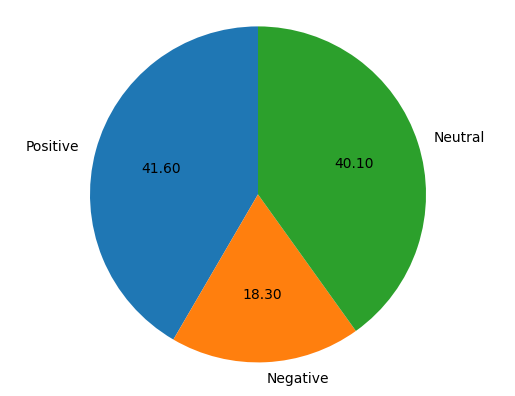

In [20]:
pieLabels=["Positive","Negative","Neutral"]

populationShare=[pos,neg,neu]

figureObject, axesObject = plt.subplots()

axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)

axesObject.axis('equal')

plt.show()

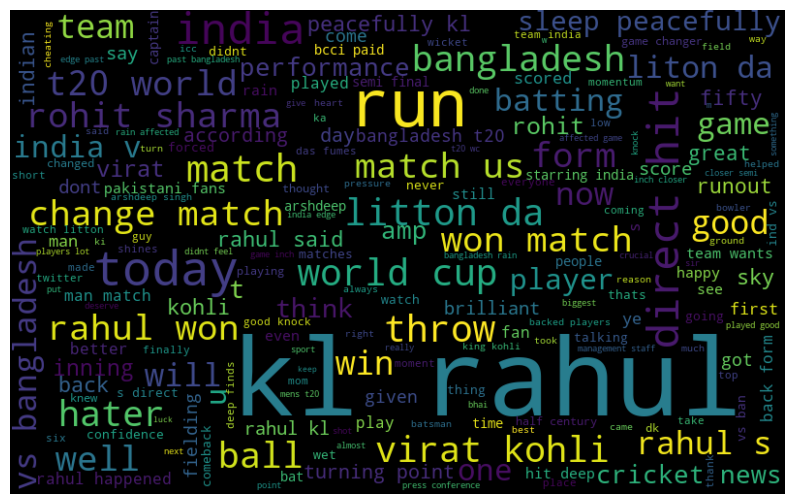

In [21]:
all_words = ' '.join([text for text in cleaned])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()